<h3>Imports </h3>

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os 
import matplotlib.pyplot as plt


## Download of dataset

In [2]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  786M    0  906k    0     0   906k      0  0:14:49  0:00:01  0:14:48  557k
  0  786M    0 2214k    0     0  1107k      0  0:12:07  0:00:02  0:12:05  843k
  0  786M    0 3637k    0     0  1212k      0  0:11:04  0:00:03  0:11:01 1003k
  0  786M    0 5081k    0     0  1270k      0  0:10:34  0:00:04  0:10:30 1098k
  0  786M    0 6501k    0     0  1300k      0  0:10:19  0:00:05  0:10:14 1272k
  1  786M    1 8155k    0     0  1359k      0  0:09:52  0:00:06  0:09:46 1449k
  1  786M    1 9781k    0     0  1397k      0  0:09:36  0:00:07  0:09:29 1513k
  1  786M    1 11.0M    0     0  1420k      0  0:09:27  0:00:08  0:09:19 1544k
  1  786M    1 12.4M    0     0  1420k      0  0:09

 23  786M   23  186M    0     0  1407k      0  0:09:32  0:02:16  0:07:16 1612k
 23  786M   23  188M    0     0  1409k      0  0:09:31  0:02:17  0:07:14 1582k
 24  786M   24  189M    0     0  1409k      0  0:09:31  0:02:18  0:07:13 1583k
 24  786M   24  190M    0     0  1404k      0  0:09:33  0:02:19  0:07:14 1383k
 24  786M   24  191M    0     0  1401k      0  0:09:34  0:02:20  0:07:14 1271k
 24  786M   24  192M    0     0  1397k      0  0:09:36  0:02:21  0:07:15 1111k
 24  786M   24  192M    0     0  1391k      0  0:09:39  0:02:22  0:07:17  875k
 24  786M   24  193M    0     0  1385k      0  0:09:41  0:02:23  0:07:18  706k
 24  786M   24  193M    0     0  1379k      0  0:09:44  0:02:24  0:07:20  667k
 24  786M   24  194M    0     0  1373k      0  0:09:46  0:02:25  0:07:21  588k
 24  786M   24  194M    0     0  1366k      0  0:09:49  0:02:26  0:07:23  506k
 24  786M   24  195M    0     0  1359k      0  0:09:52  0:02:27  0:07:25  468k
 24  786M   24  195M    0     0  1354k      0  0:09:

<h2>Unzippig of data set </h2>
<table>
    <tr>
        <td>For windows you have to manullay unzip file</td> </tr>
    <tr><td>For linux you can run <b>!unzip</b> command to unzip file </td></tr>
</table>

In [5]:
!dir

 Volume in drive G is ML_DL_Drive
 Volume Serial Number is C882-79F9

 Directory of G:\python NN code+data\Keras_model_example

19-10-2021  22:39    <DIR>          .
19-10-2021  22:39    <DIR>          ..
19-10-2021  22:25    <DIR>          .ipynb_checkpoints
19-10-2021  22:39    <DIR>          kagglecatsanddogs_3367a
19-10-2021  22:38       824,894,548 kagglecatsanddogs_3367a.zip
19-10-2021  22:39            64,924 Simple_image_classification.ipynb
               2 File(s)    824,959,472 bytes
               4 Dir(s)  170,758,254,592 bytes free


In [12]:
len(os.listdir('kagglecatsanddogs_3367a/petImages'))

2

<h3>Deleting the reductent imagaes</h3>
- Deleting  images with diffrent format than '.jpg' or 'jpeg'

In [14]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("kagglecatsanddogs_3367a/PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1578 images


<h3>Generate a Dataset


In [15]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "kagglecatsanddogs_3367a/PetImages",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "kagglecatsanddogs_3367a/PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Found 23422 files belonging to 2 classes.
Using 4684 files for validation.


<h3>Visualize the data</h3>
<p>Here are the first 9 images in the training dataset. As you can see, label 1 is "dog" and label 0 is "cat".

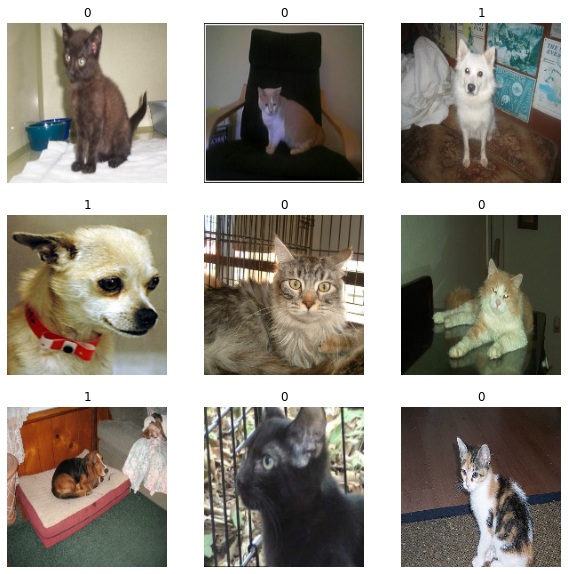

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

<h2>Using image data augmentation
</h2>
<p>When you don't have a large image dataset, it's a good practice to artificially introduce sample diversity by applying random yet realistic transformations to the training images, such as random horizontal flipping or small random rotations. This helps expose the model to different aspects of the training data while slowing down overfitting.



In [19]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

# Let's visualize 

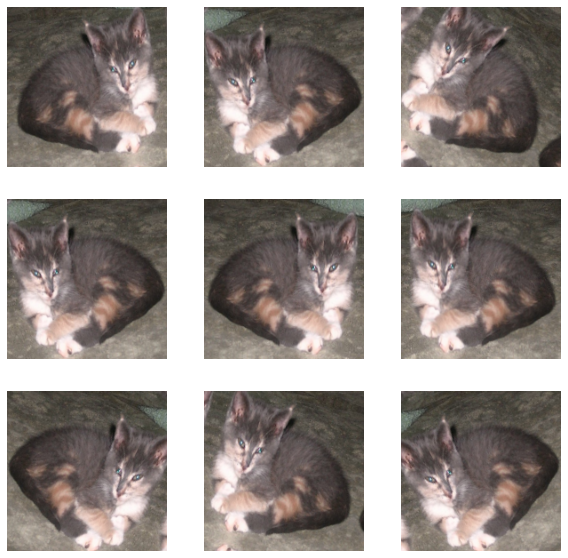

In [21]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

<h3>Standardizing the data
</h3>
<p>Our image are already in a standard size (180x180), as they are being yielded as contiguous float32 batches by our dataset. However, their RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, we will standardize values to be in the [0, 1] by using a Rescaling layer at the start of our model.

In [22]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

## Configure the dataset for performance


In [23]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

<h1>Build a model </h1>
<p>We'll build a small version of the Xception network. We haven't particularly tried to optimize the architecture; if you want to do a systematic search for the best model configuration, consider using KerasTuner

In [24]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [ ]:
epochs = 50

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,)

Epoch 1/50
586/586 [==============================] - 3496s 6s/step - loss: 0.6282 - accuracy: 0.6601 - val_loss: 0.5223 - val_accuracy: 0.7472


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
586/586 [==============================] - 4140s 7s/step - loss: 0.4642 - accuracy: 0.7834 - val_loss: 0.4036 - val_accuracy: 0.8224
Epoch 3/50
586/586 [==============================] - 3433s 6s/step - loss: 0.3753 - accuracy: 0.8362 - val_loss: 0.4768 - val_accuracy: 0.7995
Epoch 4/50
586/586 [==============================] - 3437s 6s/step - loss: 0.3115 - accuracy: 0.8667 - val_loss: 0.2752 - val_accuracy: 0.8828
Epoch 5/50
586/586 [==============================] - 3428s 6s/step - loss: 0.2712 - accuracy: 0.8852 - val_loss: 0.2779 - val_accuracy: 0.8768
Epoch 6/50
586/586 [==============================] - 3451s 6s/step - loss: 0.2413 - accuracy: 0.8981 - val_loss: 0.7298 - val_accuracy: 0.7765
Epoch 7/50
586/586 [==============================] - 3429s 6s/step - loss: 0.2082 - accuracy: 0.9139 - val_loss: 0.2393 - val_accuracy: 0.8943
Epoch 8/50
586/586 [==============================] - 3434s 6s/step - loss: 0.1918 - accuracy: 0.9204 - val_loss: 0.3337 - val_accuracy: